In [1]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [3]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [4]:
#Cargar archivo csv desde seaborn
df=pd.read_csv('projectos_forvia.csv')
df.head(5)

,Number,Active,Project Name,Project Type,Geographical scope,Project manager,State,Percent complete,Project size,Project organization,...,Closed,Domain,Domain Path,Last WAR,Project Health,Project type,Recurrent activity,Planned start date,Actual start date,On-hold
0,PRJ0075198,VERDADERO,TCO - FIS - ABRERA - VW210 IP,Shopfloor JIT/TCO,ABRERA FIS,BENAVENT Pablo,Work in progress,26.47,SMALL,GIT/IT EMEA/MES & Digital Shopfloor projects,...,NaN,global,/,PRJSTAT0075304,Green,Regular,FALSO,1/2/2025 17:01,NaN,FALSO
1,PRJ0073962,VERDADERO,TCO - FCM - ALLENJOIE FHS - GEN2 New automated...,Shopfloor JIT/TCO,ALLENJOIE FCM,MAUVAIS Julien,Work in progress,52.17,LARGE,GIT/IT EMEA/MES & Digital Shopfloor projects,...,NaN,global,/,PRJSTAT0075248,Yellow,Regular,FALSO,18/01/2024 08:00:00,18/01/2024 08:00:00,VERDADERO
2,PRJ0074556,VERDADERO,TCO - FCM - ALLENJOIE FHS - Tank XL,Shopfloor JIT/TCO,ALLENJOIE FHS,THIERY Jean-Francois,Work in progress,95.85,MEDIUM,GIT/IT EMEA/MES & Digital Shopfloor projects,...,NaN,global,/,PRJSTAT0075265,Yellow,Regular,FALSO,12/8/2024 8:00,12/8/2024 8:00,FALSO
3,PRJ0075087,VERDADERO,TCO - FCM - ALLENJOIE FHS - STELLANTIS - XL694...,Shopfloor JIT/TCO,ALLENJOIE FHS,MAUVAIS Julien,Work in progress,20.90,SMALL,GIT/IT EMEA/MES & Digital Shopfloor projects,...,NaN,global,/,PRJSTAT0075325,Green,Regular,FALSO,8/1/2025 8:00,15/01/2025 09:52:03,VERDADERO
4,PRJ0075456,VERDADERO,TCO – FCM - ALMUSSAFES - FORD - C482 Welding l...,Shopfloor JIT/TCO,ALMUSSAFES FCM,BENAVENT Pablo,Work in progress,24.30,MEDIUM,GIT/IT EMEA/MES & Digital Shopfloor projects,...,NaN,global,/,PRJSTAT0075307,Green,Regular,FALSO,12/5/2025 8:00,12/5/2025 8:00,FALSO


In [5]:
df = df.drop(['Actual end date', 'Closed', 'Project target phase', 'Actual Go Live date'],axis=1)

valores_nulos = df.isnull().sum()
valores_nulos

Number                   1
Active                   1
Project Name             1
Project Type             1
Geographical scope       1
Project manager          1
State                    1
Percent complete         1
Project size             1
Project organization     1
Planned Go Live date     1
BG                       1
Domain                   1
Domain Path              1
Last WAR                14
Project Health          14
Project type             1
Recurrent activity       1
Planned start date       0
Actual start date       19
On-hold                  1
dtype: int64

In [6]:
df["Number"] =df["Number"].fillna("No description available")
df["Active"] =df["Active"].fillna("No description available")
df["Project Name"] =df["Project Name"].fillna("No Name")
df["Project Type"] =df["Project Type"].fillna("No description available")
df["Geographical scope"] =df["Geographical scope"].fillna("No description available")
df["Project manager"] =df["Project manager"].fillna("No description available")
df["State"] =df["State"].fillna("Not available")
df["Project size"] =df["Project size"].fillna("Not available")
df["Project organization"] =df["Project organization"].fillna("Not available")
df["Planned Go Live date"] =df["Planned Go Live date"].fillna("Not available")
df["BG"] =df["BG"].fillna("Not available")
df["Domain"] =df["Domain"].fillna("No description available")
df["Domain Path"] =df["Domain Path"].fillna("/")
df["Last WAR"] =df["Last WAR"].fillna("No description available")
df["Project Health"] =df["Project Health"].fillna("No color available")
df["Project type"] =df["Project type"].fillna("Regular")
df["Recurrent activity"] =df["Recurrent activity"].fillna("FALSO")
df["Actual start date"] =df["Actual start date"].fillna("NO DATE REGISTERED")
df["On-hold"] =df["On-hold"].fillna("No description available")
df['Percent complete'] = df['Percent complete'].fillna(0)

In [7]:
lista_cambio = ['Project Type','Geographical scope','Project manager','State','Project size','Project organization','BG','Project Health','On-hold']

In [8]:
#Obtengo un análisis univariado de las variables categóricas
n=0
for col in lista_cambio:
    Tabla_freq = df[col].value_counts()
    mapeo = {cat: i+1 for i, cat in enumerate(Tabla_freq.index.unique())}
    # print(mapeo)
    df[col] = df[col].map(mapeo)
    # df[col] = pd.factorize(df[col][0+n])
    # n+=1
    
print (df[lista_cambio])

     Project Type  Geographical scope  Project manager  State  Project size  \
0               1                  63                2      1             3   
1               1                  62               15      1             2   
2               1                  51               20      1             1   
3               1                  51               15      1             3   
4               1                  61                2      1             1   
..            ...                 ...              ...    ...           ...   
241             6                  43              119      1             2   
242             8                 126               27      1             1   
243             8                  42               27      1             1   
244             1                  42              120      1             3   
245            12                 127              121      4             4   

     Project organization  BG  Project Health  On-h

In [9]:
cuantitativas= df.select_dtypes(include=["int64","float64"])
cualitativas = df.select_dtypes(include=["object"])

Tabla_numericas = df[lista_cambio]
Tabla_numericas["Percent complete"] = df.loc[:, ["Percent complete"]]
print(Tabla_numericas)
# print(cuantitativas)
# print(cualitativas)
# cuantitativas.head()
# variables_categoricas_num = ['Project Type','State','Percent complete', 'Project size', 'Project organization']

     Project Type  Geographical scope  Project manager  State  Project size  \
0               1                  63                2      1             3   
1               1                  62               15      1             2   
2               1                  51               20      1             1   
3               1                  51               15      1             3   
4               1                  61                2      1             1   
..            ...                 ...              ...    ...           ...   
241             6                  43              119      1             2   
242             8                 126               27      1             1   
243             8                  42               27      1             1   
244             1                  42              120      1             3   
245            12                 127              121      4             4   

     Project organization  BG  Project Health  On-h

C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\1251541806.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tabla_numericas["Percent complete"] = df.loc[:, ["Percent complete"]]


                      Project Type  Geographical scope  Project manager  \
Project Type              1.000000            0.058818         0.304068   
Geographical scope        0.058818            1.000000         0.099880   
Project manager           0.304068            0.099880         1.000000   
State                     0.205069            0.032650         0.086108   
Project size              0.024297           -0.009333         0.009447   
Project organization      0.375739            0.064871         0.502209   
BG                        0.386941           -0.055844         0.277785   
Project Health            0.033295            0.017746        -0.078813   
On-hold                   0.072061            0.088189        -0.108203   
Percent complete         -0.035967            0.037350        -0.069807   

                         State  Project size  Project organization        BG  \
Project Type          0.205069      0.024297              0.375739  0.386941   
Geographical s

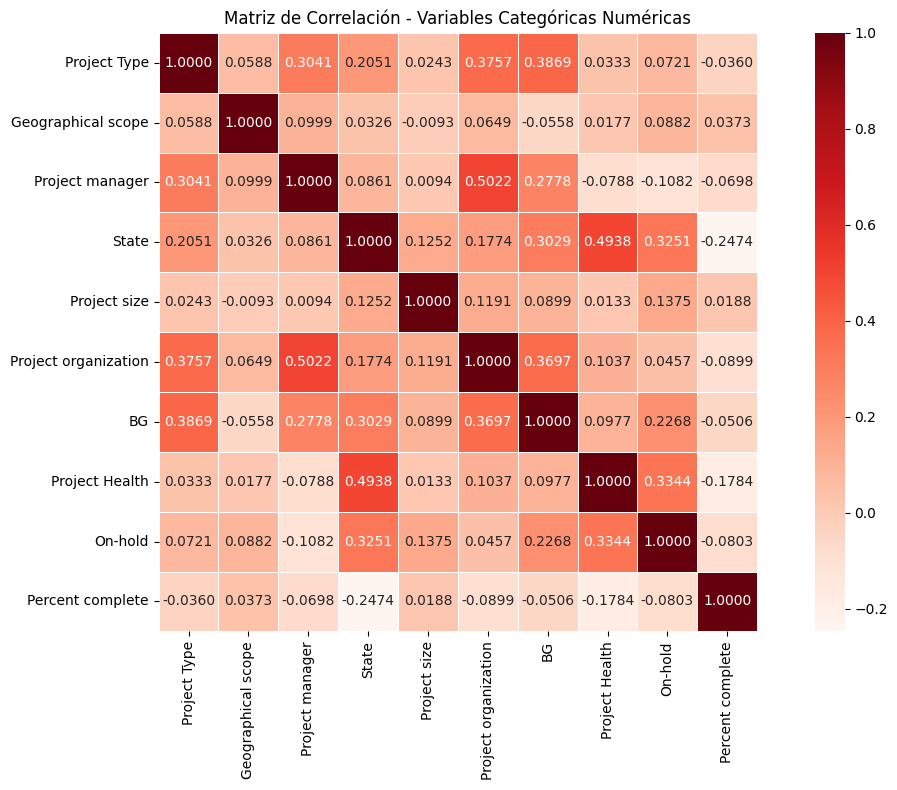

Matriz de correlación:
                      Project Type  Geographical scope  Project manager  \
Project Type                 1.000               0.059            0.304   
Geographical scope           0.059               1.000            0.100   
Project manager              0.304               0.100            1.000   
State                        0.205               0.033            0.086   
Project size                 0.024              -0.009            0.009   
Project organization         0.376               0.065            0.502   
BG                           0.387              -0.056            0.278   
Project Health               0.033               0.018           -0.079   
On-hold                      0.072               0.088           -0.108   
Percent complete            -0.036               0.037           -0.070   

                      State  Project size  Project organization     BG  \
Project Type          0.205         0.024                 0.376  0.387   
Geo

In [10]:
# Regresión Lineal Simple
# Crea una tabla de los 5 pares de variables con mayor correlación (apoyándote de la herramienta Heatmap).
# Calculamos la correlación de las variables categóricas convertidas a numéricas
correlation_matrix = Tabla_numericas.corr()
print(correlation_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".4f",
            square=True, linewidths=0.5)
plt.title("Matriz de Correlación - Variables Categóricas Numéricas")
plt.tight_layout()
plt.show()

print("Matriz de correlación:")
print(correlation_matrix.round(3))

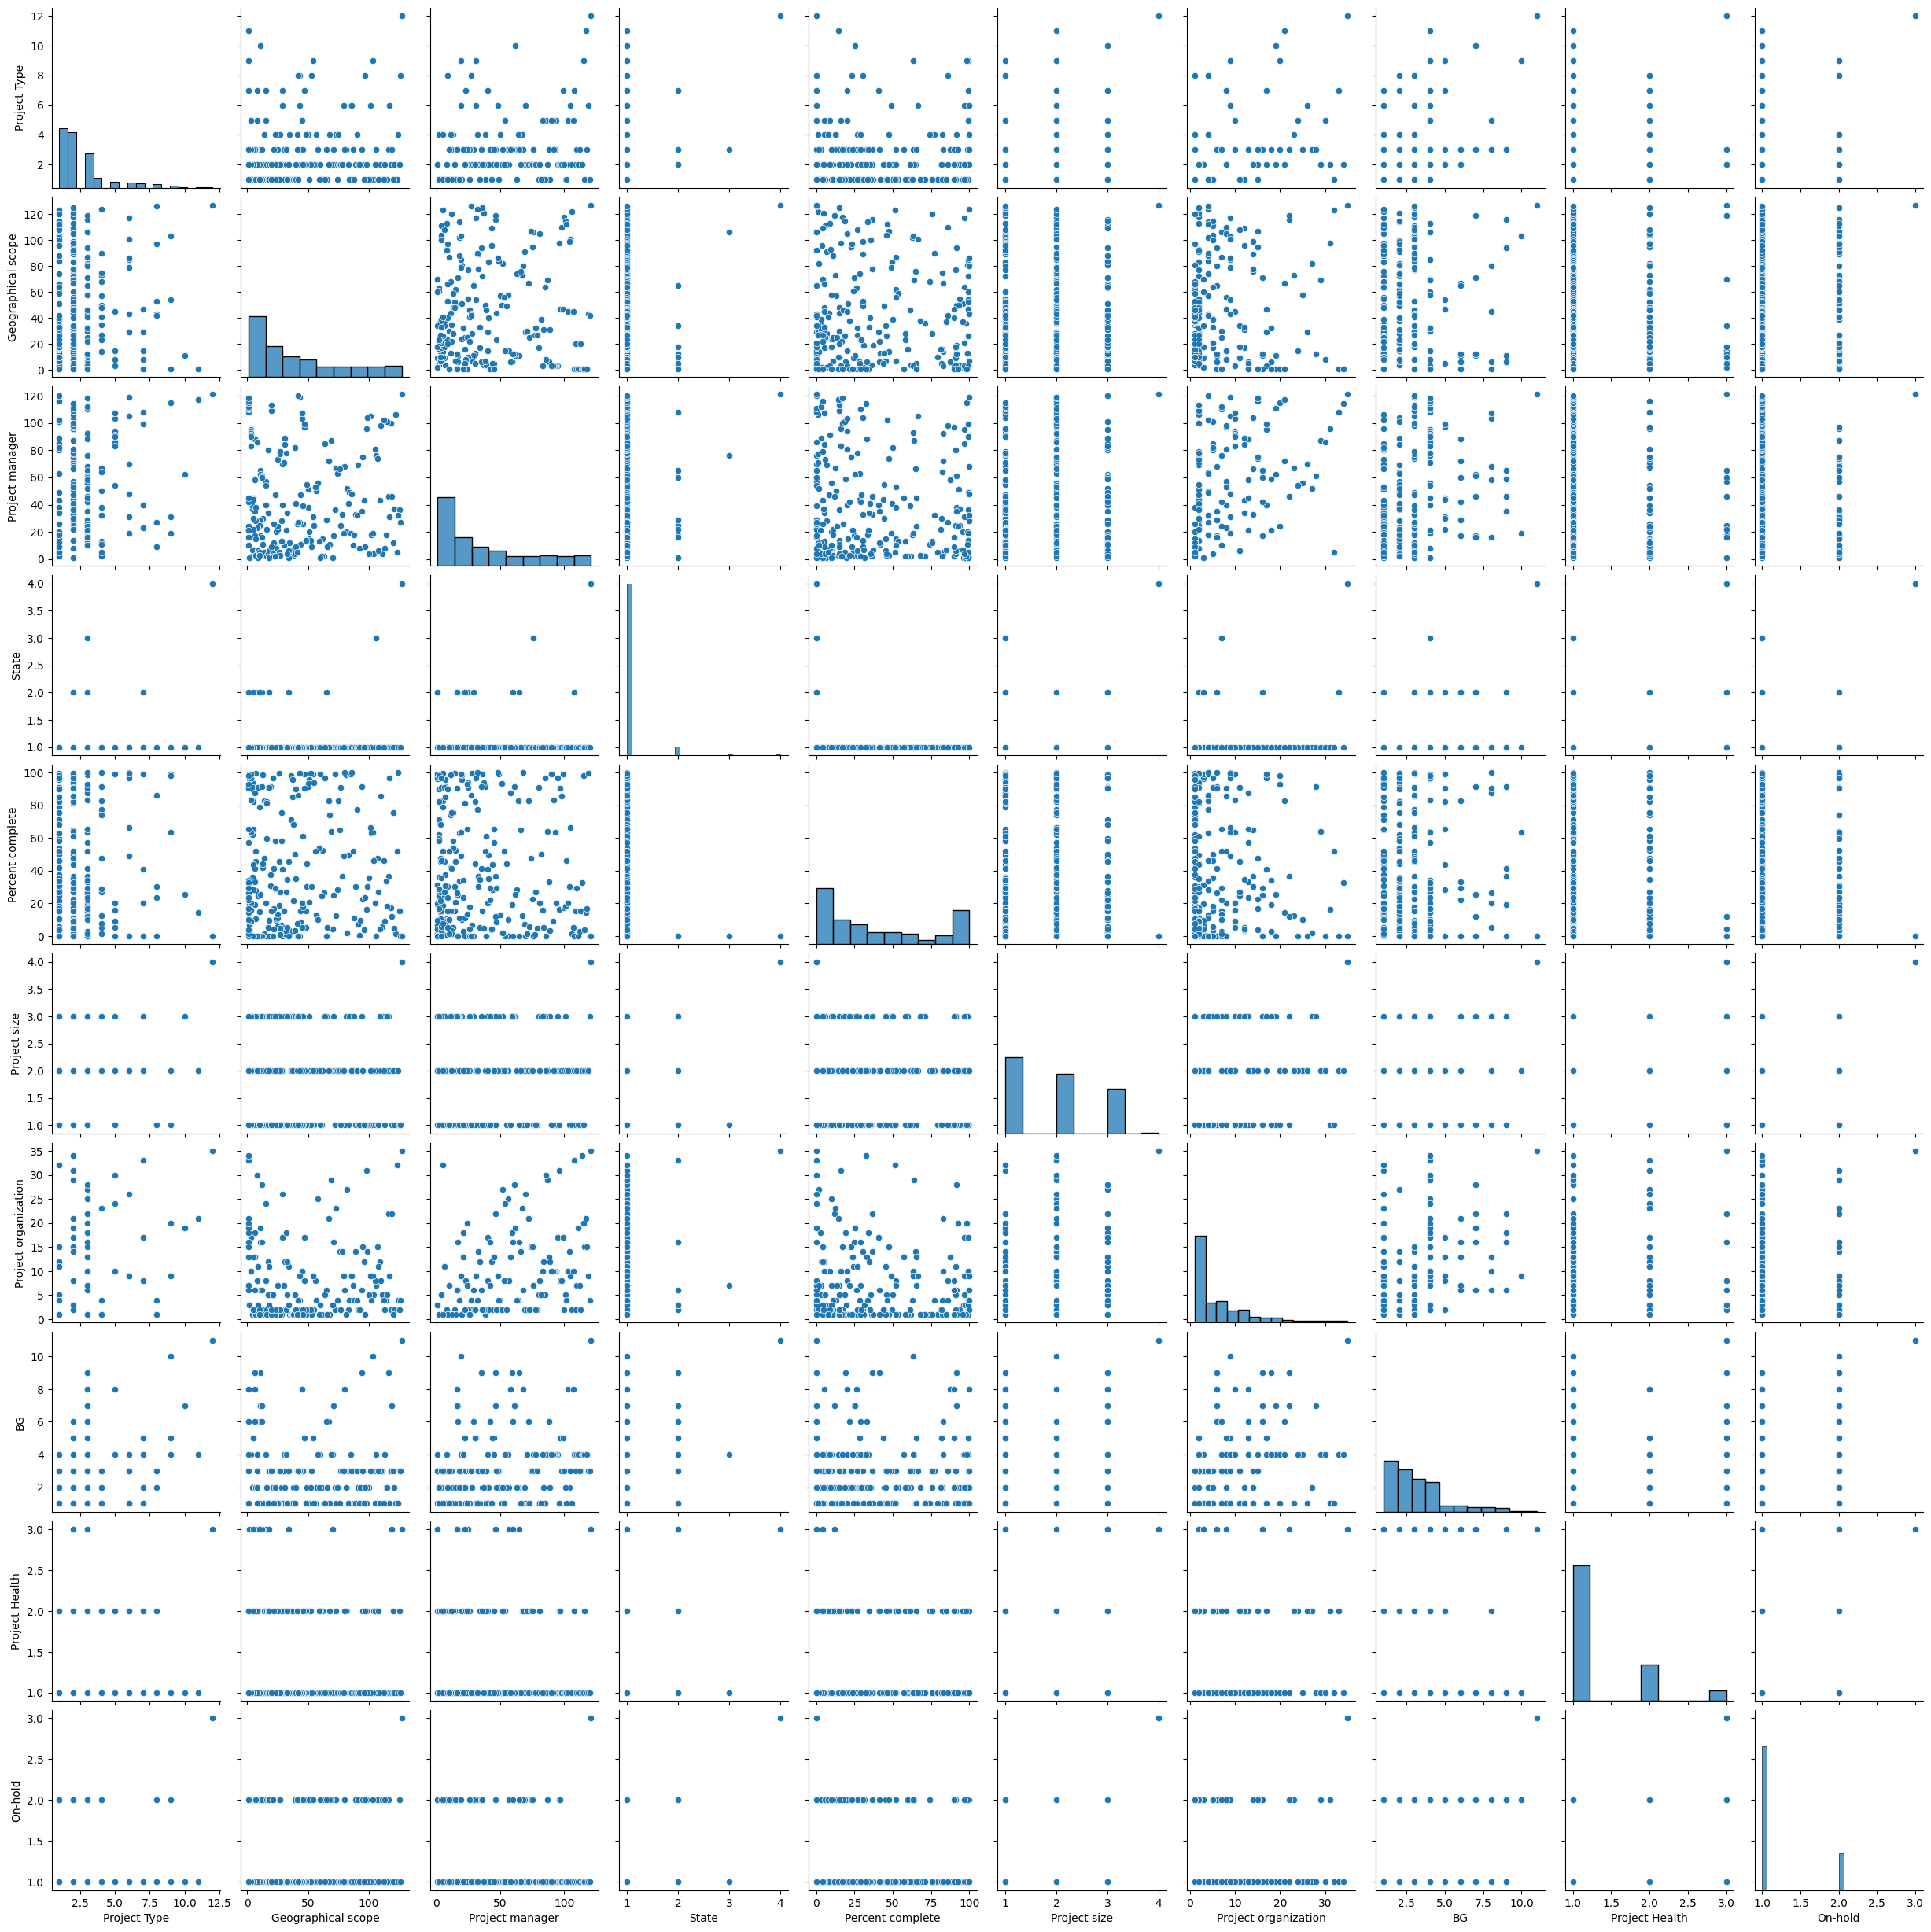

In [11]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df)

Elegir 2 modelos de correlación No lineal y Analizar la correlación que existe entre las siguientes variables: Project Type (variable objetivo), Geographical scope (variable objetivo), Project manager (variable objetivo), State (variable objetivo), Project size (variable objetivo), Project organization (variable objetivo), BG (variable objetivo), On-hold (variable objetivo), Percent complete (variable objetivo) y Project Health (variable objetivo), aplicando la herramienta de “Regresión No Lineal”

***Project Type***

In [12]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['BG']]
Var_Dep= df['Project Type']

In [13]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

y = ax^2 + bx + c   ("Función cuadrática")

In [14]:
#y = ax^2 + bx + c   ("Función cuadrática")

def func1(x, a, b, c):
    return a*x**2 + b*x + c

In [15]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs1= curve_fit(func1, df['BG'], df['Project Type'])

In [16]:
# Predicciones
y_pred1 = func1(x, *parametros1)

C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\2533387887.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\2533387887.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y = ax^2 + bx + c", color= "red")


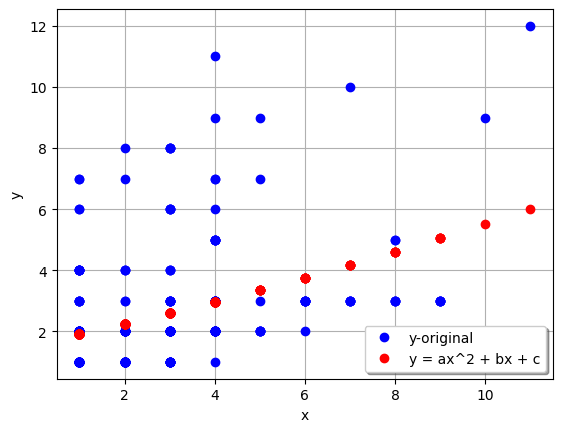

In [17]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y = ax^2 + bx + c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [18]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 

0.15024503160176716

In [19]:
#Calculamos el coeficiente de correlación del modelo
R1 = np.sqrt(R2_Modelo1)
R1

np.float64(0.3876145399772397)

y = a*exp(-bx) + c   ("Función exponencial")

In [20]:
#y = a*exp(-bx) + c   ("Función exponencial")

# Definimos la función exponencial
def func2(x, a, b, c):
    return a * np.exp(-b * x) + c

In [21]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, df['BG'], df['Project Type'])

C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\405219039.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros2, covs2= curve_fit(func2, df['BG'], df['Project Type'])


In [22]:
# Predicciones
y_pred2 = func2(x, *parametros2)

C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\513720704.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\513720704.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred2,'bo', label="y = a*exp(-bx) + c", color= "red")


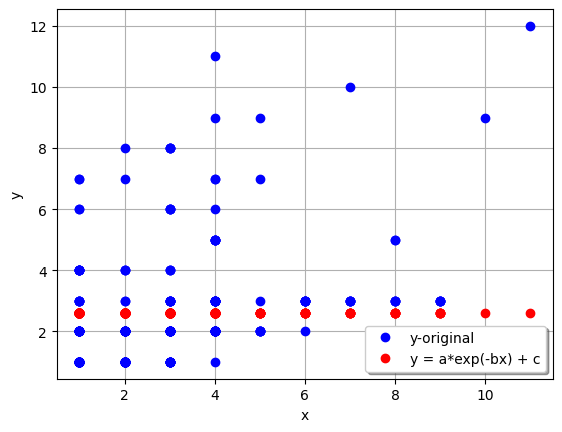

In [23]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred2,'bo', label="y = a*exp(-bx) + c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [24]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y, y_pred2) 
R2_Modelo2

3.3306690738754696e-16

In [25]:
#Calculamos el coeficiente de correlación del modelo
R2 = np.sqrt(R2_Modelo2)
R2

np.float64(1.8250120749944284e-08)

***Geographical scope***

In [80]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['Project manager']]
Var_Dep= df['Geographical scope']

In [81]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

#y = ax^2 + bx + c   ("Función cuadrática")

In [82]:


#y = ax^2 + bx + c   ("Función cuadrática")

def func1(x, a, b, c):
    return a*x**2 + b*x + c

In [83]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs1= curve_fit(func1, df['Project manager'], df['Geographical scope'])

In [84]:
# Predicciones
y_pred1 = func1(x, *parametros1)

C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\2533387887.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\2533387887.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y = ax^2 + bx + c", color= "red")


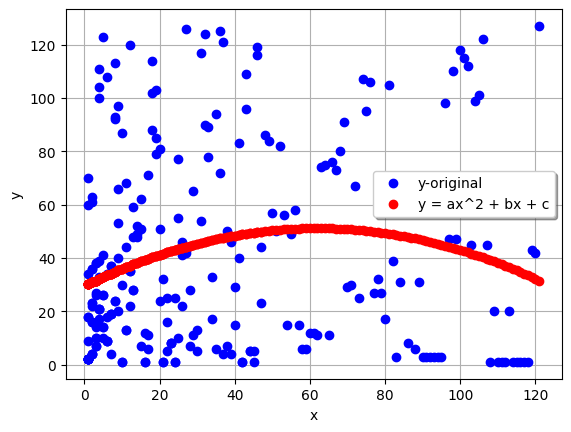

In [85]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y = ax^2 + bx + c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [86]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 

0.03658084956744878

In [87]:
#Calculamos el coeficiente de correlación del modelo
R1 = np.sqrt(R2_Modelo1)
R1

np.float64(0.19126120769107566)

y = (a*x**2 + b)/ c*x**2 (Función cociente entre polinomios)

In [118]:
#y = (a*x**2 + b)/ c*x**2 (Función cociente entre polinomios)

def func7(x, a, b, c):
    return (a * x**2 + b) / (c * x**2)

In [119]:
#Ajustamos los parámetros de la función curve_fit
parametros7, covs7= curve_fit(func7, df['Project manager'], df['Geographical scope'])

In [120]:
# Predicciones
y_pred7 = func7(x, *parametros7)

C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\1760668751.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\1760668751.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred7,'bo', label="y = (a*x**2 + b)/ c*x**2", color= "red")


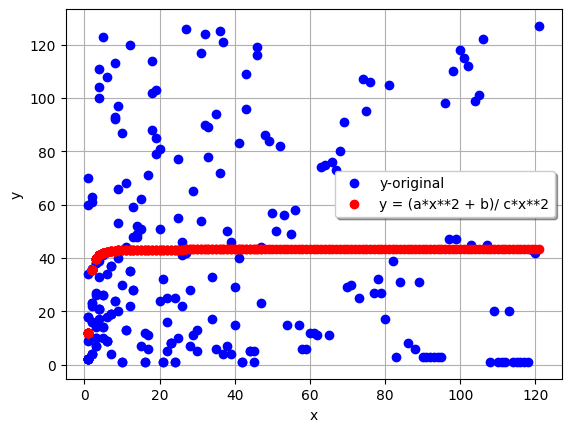

In [121]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred7,'bo', label="y = (a*x**2 + b)/ c*x**2", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [122]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo7 = r2_score(y, y_pred7) 
R2_Modelo7

0.04073177535410233

In [123]:
#Calculamos el coeficiente de correlación del modelo
R7 = np.sqrt(R2_Modelo7)
R7

np.float64(0.2018211469447697)

***Project manager***

In [148]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['Project organization']]
Var_Dep= df['Project manager']

In [149]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

y = ax^2 + bx + c   ("Función cuadrática")

In [150]:

#y = ax^2 + bx + c   ("Función cuadrática")

def func1(x, a, b, c):
    return a*x**2 + b*x + c

In [151]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs1= curve_fit(func1, df['Project organization'], df['Project manager'])

In [152]:
# Predicciones
y_pred1 = func1(x, *parametros1)

C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\2533387887.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\2533387887.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y = ax^2 + bx + c", color= "red")


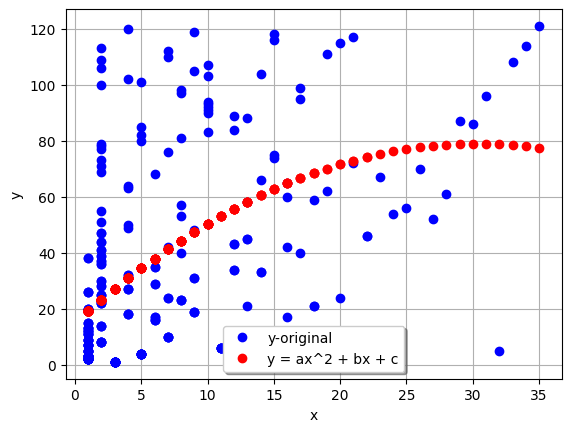

In [153]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y = ax^2 + bx + c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [154]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 

0.27239722352395723

In [155]:
#Calculamos el coeficiente de correlación del modelo
R1 = np.sqrt(R2_Modelo1)
R1

np.float64(0.5219168741513894)

y = a*np.log(x) + b  (Función logaritmica)


In [192]:
# y = a*np.log(x) + b  (Función logaritmica)

def func8(x, a, b):
    return a * np.log(x) + b

In [193]:
#Ajustamos los parámetros de la función curve_fit
parametros8, covs8= curve_fit(func8, df['Project organization'], df['Project manager'])

In [194]:
# Predicciones
y_pred8 = func8(x, *parametros8) 

C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\4165925883.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\4165925883.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred8,'bo', label="y = a*np.log(x) + b", color= "red")


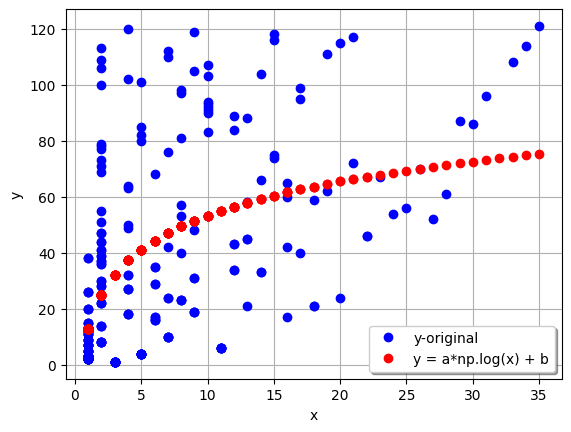

In [195]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred8,'bo', label="y = a*np.log(x) + b", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [196]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo8= r2_score(y, y_pred8) 
R2_Modelo8

0.2885749257596263

In [197]:
#Calculamos el coeficiente de correlación del modelo
R8 = np.sqrt(R2_Modelo8)
R8

np.float64(0.5371917029884455)

State

In [210]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['Project Health']]
Var_Dep= df['State']

In [211]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

y = a*np.sin(x) + b ("Función senoidal")

In [224]:
#y = a*np.sin(x) + b ("Función senoidal")

def func4(x, a, b):
    return a * np.sin(x) + b

In [225]:
#Ajustamos los parámetros de la función curve_fit
parametros4, covs4= curve_fit(func4, df['Project Health'], df['State'])

In [226]:
# Predicciones
y_pred4 = func4(x, *parametros4)

C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\1037010290.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\1037010290.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred4,'bo', label="y = a*np.sin(x) + b", color= "red")


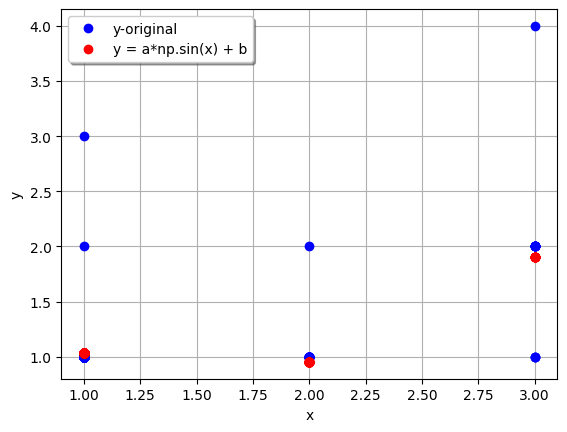

In [227]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred4,'bo', label="y = a*np.sin(x) + b", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [228]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo4 = r2_score(y, y_pred4) 
R2_Modelo4

0.4473313777277742

In [229]:
#Calculamos el coeficiente de correlación del modelo
R4 = np.sqrt(R2_Modelo4)
R4

np.float64(0.6688283619343413)

y = a*np.abs(x) + b*x + c (Función Valor absoluto)

In [236]:
#y = a*np.abs(x) + b*x + c (Función Valor absoluto)

def func6(x, a, b, c):
    return a * np.abs(x) + b * x + c

In [237]:
#Ajustamos los parámetros de la función curve_fit
parametros6, covs6= curve_fit(func6, df['Project Health'], df['State'])

In [238]:
# Predicciones
y_pred6 = func6(x, *parametros6)

C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\2473440597.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\2473440597.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred6,'bo', label="y = a*np.abs(x) + b*x + c", color= "red")


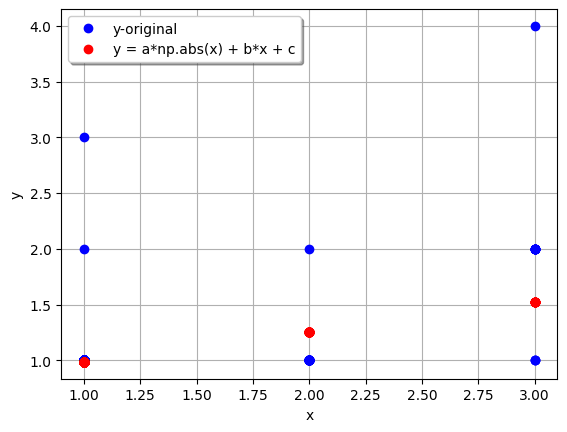

In [239]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred6,'bo', label="y = a*np.abs(x) + b*x + c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [240]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo6 = r2_score(y, y_pred6) 
R2_Modelo6

0.24383528186414583

In [241]:
#Calculamos el coeficiente de correlación del modelo
R6 = np.sqrt(R2_Modelo6)
R6

np.float64(0.49379680220121497)

***Project Size***

In [272]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['On-hold']]
Var_Dep= df['Project size']

In [273]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

y = ax^2 + bx + c ("Función cuadrática")

In [274]:
#y = ax^2 + bx + c   ("Función cuadrática")

def func1(x, a, b, c):
    return a*x**2 + b*x + c

In [275]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs1= curve_fit(func1, df['On-hold'], df['Project size'])

In [276]:
# Predicciones
y_pred1 = func1(x, *parametros1)

C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\2533387887.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\2533387887.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y = ax^2 + bx + c", color= "red")


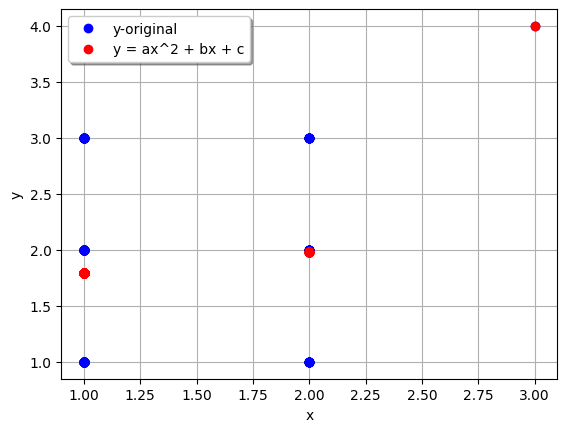

In [277]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y = ax^2 + bx + c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [278]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 

0.03799753709842291

In [279]:
#Calculamos el coeficiente de correlación del modelo
R1 = np.sqrt(R2_Modelo1)
R1

np.float64(0.19492956958456278)

In [298]:
#y = a*np.abs(x) + b*x + c (Función Valor absoluto)

def func6(x, a, b, c):
    return a * np.abs(x) + b * x + c

In [299]:
#Ajustamos los parámetros de la función curve_fit
parametros6, covs6= curve_fit(func6, df['On-hold'], df['Project size'])

In [300]:
# Predicciones
y_pred6 = func6(x, *parametros6)

C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\2473440597.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\2473440597.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred6,'bo', label="y = a*np.abs(x) + b*x + c", color= "red")


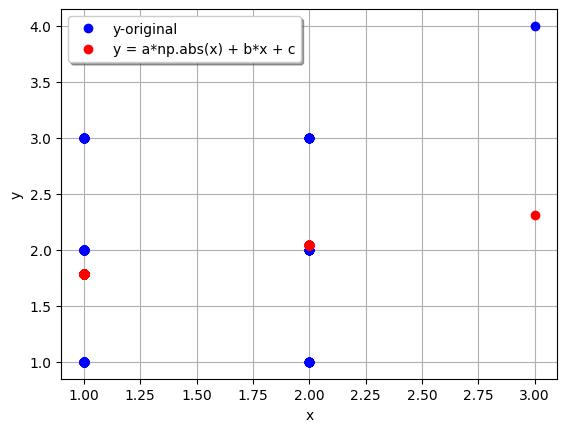

In [301]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred6,'bo', label="y = a*np.abs(x) + b*x + c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [302]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo6 = r2_score(y, y_pred6) 
R2_Modelo6

0.018892942709859972

In [303]:
#Calculamos el coeficiente de correlación del modelo
R6 = np.sqrt(R2_Modelo6)
R6

np.float64(0.13745160133610657)

***Project organization***

In [334]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['Project manager']]
Var_Dep= df['Project organization']

In [335]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

y = ax^2 + bx + c   ("Función cuadrática")

In [336]:
#y = ax^2 + bx + c   ("Función cuadrática")

def func1(x, a, b, c):
    return a*x**2 + b*x + c

In [337]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df['Project manager'], df['Project organization'])

In [338]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros1

array([-5.22878305e-04,  1.61012243e-01,  2.29569075e+00])

In [339]:
# Predicciones
y_pred1 = func1(x, *parametros1)

In [340]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred1

,Project manager
0,2.615624
1,4.593227
2,5.306784
3,4.593227
4,2.615624
...,...
241,14.051668
242,6.261843
243,6.261843
244,14.087712


C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\4154269995.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\4154269995.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con y=a*x^2+b*x+c", color= "red")


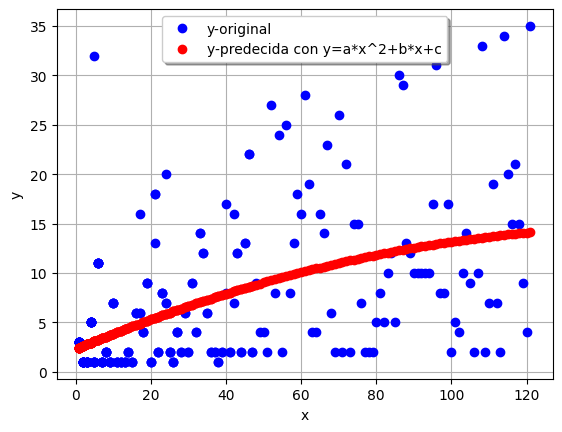

In [341]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y-predecida con y=a*x^2+b*x+c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [342]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 

0.257929110201753

In [343]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
R

np.float64(0.5078672170969032)

y = a*np.abs(x) + b*x + c (Función Valor absoluto)

In [376]:
#y = a*np.abs(x) + b*x + c (Función Valor absoluto)

def func6(x, a, b, c):
    return a * np.abs(x) + b * x + c

In [377]:
#Ajustamos los parámetros de la función curve_fit
parametros6, covs6= curve_fit(func6, df['Project manager'], df['Project organization'])

In [378]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros6

array([100.06255133, -99.95660997,   2.96807106])

In [379]:
# Predicciones
y_pred6 = func6(x, *parametros6)

In [380]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred6

,Project manager
0,3.179954
1,4.557192
2,5.086898
3,4.557192
4,3.179954
...,...
241,15.575093
242,5.828488
243,5.828488
244,15.681035


C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\1636421464.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original" , color= "blue")
C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\1636421464.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred6, 'bo', label=" y = a*np.abs(x) + b*x + c ", color= "red")


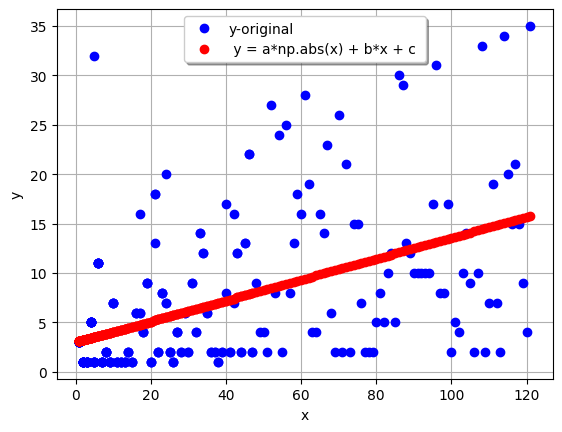

In [381]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original" , color= "blue")
plt.plot(x, y_pred6, 'bo', label=" y = a*np.abs(x) + b*x + c ", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [382]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo6 = r2_score(y, y_pred6) 
R2_Modelo6

0.25221379313504944

In [383]:
#Calculamos el coeficiente de correlación del modelo
R6 = np.sqrt(R2_Modelo6)
R6

np.float64(0.5022089138347202)

***BG***

In [424]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['Project Type']]
Var_Dep= df['BG']

In [425]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

y = (a*x**2 + b)/ c*x**2 (Función cociente entre polinomios)

In [474]:
#y = (a*x**2 + b)/ c*x**2 (Función cociente entre polinomios)

def func7(x, a, b, c):
    return (a * x**2 + b) / (c * x**2)

In [475]:
#Ajustamos los parámetros de la función curve_fit
parametros7, covs7= curve_fit(func7, df['Project Type'], df['BG'])

In [476]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros7

array([ 23.7982055 , -14.05071833,   6.05637562])

In [477]:
# Predicciones
y_pred7 = func7(x, *parametros7)

In [478]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred7

,Project Type
0,1.609459
1,1.609459
2,1.609459
3,1.609459
4,1.609459
...,...
241,3.865003
242,3.893197
243,3.893197
244,1.609459


C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\4067399592.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original" , color= "blue")
C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\4067399592.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred7, 'bo', label="y = (a*x**2 + b)/ c*x**2", color= "red")


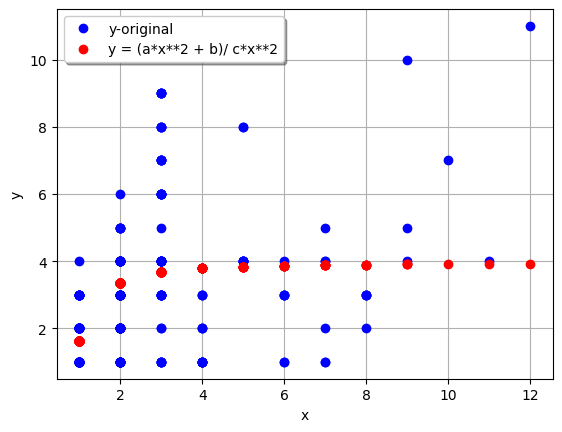

In [479]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original" , color= "blue")
plt.plot(x, y_pred7, 'bo', label="y = (a*x**2 + b)/ c*x**2", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [480]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo7 = r2_score(y, y_pred7) 
R2_Modelo7

0.21280277961192817

In [481]:
#Calculamos el coeficiente de correlación del modelo
R7 = np.sqrt(R2_Modelo7)
R7

np.float64(0.4613055165635115)

y = a*np.log(x) + b  (Función logaritmica)

In [482]:
# y = a*np.log(x) + b  (Función logaritmica)

def func8(x, a, b):
    return a * np.log(x) + b

In [483]:
#Ajustamos los parámetros de la función curve_fit
parametros8, covs8= curve_fit(func8, df['Project Type'], df['BG'])

In [484]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros8

array([1.42857445, 1.87914075])

In [485]:
# Predicciones
y_pred8 = func8(x, *parametros8)

In [486]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred8

,Project Type
0,1.879141
1,1.879141
2,1.879141
3,1.879141
4,1.879141
...,...
241,4.438803
242,4.849778
243,4.849778
244,1.879141


C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\1930228193.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original" , color= "blue")
C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\1930228193.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred8, 'bo', label=" y = a*np.log(x) + b", color= "red")


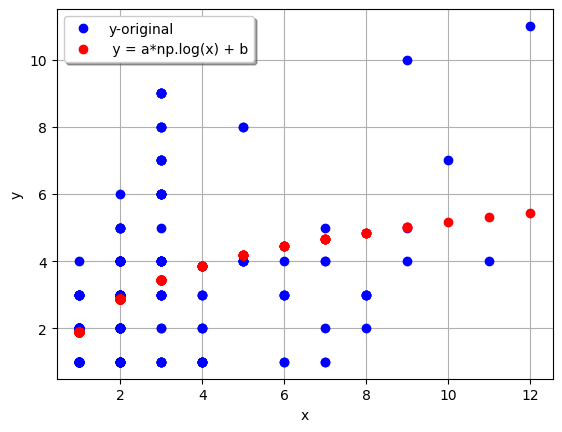

In [487]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original" , color= "blue")
plt.plot(x, y_pred8, 'bo', label=" y = a*np.log(x) + b", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [488]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo8 = r2_score(y, y_pred8) 
R2_Modelo8

0.20391032147497468

In [489]:
#Calculamos el coeficiente de correlación del modelo
R8 = np.sqrt(R2_Modelo8)
R8

np.float64(0.45156430491678)

***On-hold***

In [514]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['Project Health']]
Var_Dep= df['On-hold']

In [515]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

y = ax^2 + bx + c   

In [516]:
#y = ax^2 + bx + c   ("Función cuadrática")

def func1(x, a, b, c):
    return a*x**2 + b*x + c

In [517]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs1= curve_fit(func1, df['Project Health'], df['On-hold'])

In [518]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros1

array([ 0.1016505 , -0.12049738,  1.16092339])

In [519]:
# Predicciones
y_pred1 = func1(x, *parametros1)

In [520]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred1

,Project Health
0,1.142077
1,1.326531
2,1.326531
3,1.142077
4,1.142077
...,...
241,1.142077
242,1.142077
243,1.142077
244,1.142077


C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\2251454816.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original" , color= "blue")
C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\2251454816.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1, 'bo', label="y = ax^2 + bx + c", color= "red")


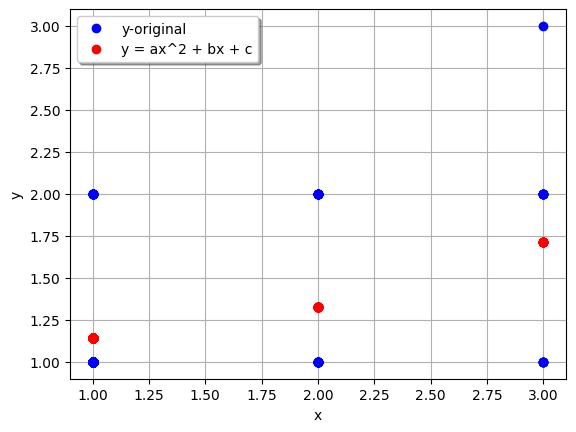

In [521]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original" , color= "blue")
plt.plot(x, y_pred1, 'bo', label="y = ax^2 + bx + c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [522]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1

0.11787227395219135

In [523]:
#Calculamos el coeficiente de correlación del modelo
R1 = np.sqrt(R2_Modelo1)
R1

np.float64(0.34332531795979065)

y = a*np.abs(x) + b*x + c (Función Valor absoluto)

In [547]:
#y = a*np.abs(x) + b*x + c (Función Valor absoluto)

def func6(x, a, b, c):
    return a * np.abs(x) + b * x + c

In [548]:
#Ajustamos los parámetros de la función curve_fit
parametros6, covs6= curve_fit(func6, df['Project Health'], df['On-hold'])

In [549]:
parametros6

array([-111.39331332,  111.63712016,    0.89126175])

In [550]:
# Predicciones
y_pred6 = func6(x, *parametros6)

C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\657339043.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original" , color= "blue")
C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\657339043.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred6, 'bo', label="y = a*np.abs(x) + b*x + c", color= "red")


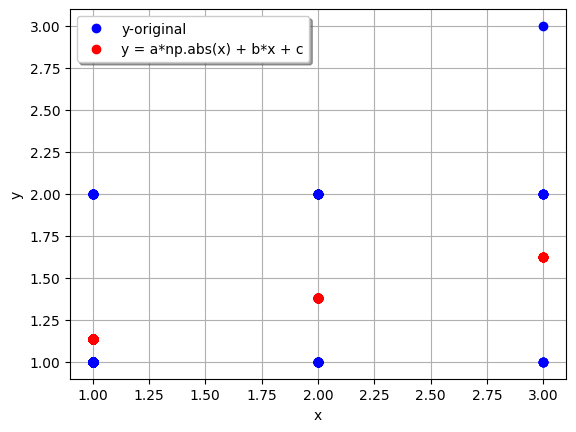

In [551]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original" , color= "blue")
plt.plot(x, y_pred6, 'bo', label="y = a*np.abs(x) + b*x + c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [552]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo6 = r2_score(y, y_pred6) 
R2_Modelo6

0.11181009513157991

In [553]:
#Calculamos el coeficiente de correlación del modelo
R6 = np.sqrt(R2_Modelo6)
R6

np.float64(0.3343801655774157)

***Percent complete***

In [594]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['Project Health']]
Var_Dep= df['Percent complete']

In [595]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

y = ax^2 + bx + c   ("Función cuadrática")

In [596]:
#y = ax^2 + bx + c   ("Función cuadrática")

def func1(x, a, b, c):
    return a*x**2 + b*x + c

In [597]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs1= curve_fit(func1, df['Project Health'], df['Percent complete'])

In [598]:
parametros1

array([-21.76536523,  67.04070369,  -4.07096688])

In [599]:
# Predicciones
y_pred1 = func1(x, *parametros1)

In [600]:
y_pred1

,Project Health
0,41.204372
1,42.948980
2,42.948980
3,41.204372
4,41.204372
...,...
241,41.204372
242,41.204372
243,41.204372
244,41.204372


C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\2251454816.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original" , color= "blue")
C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\2251454816.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1, 'bo', label="y = ax^2 + bx + c", color= "red")


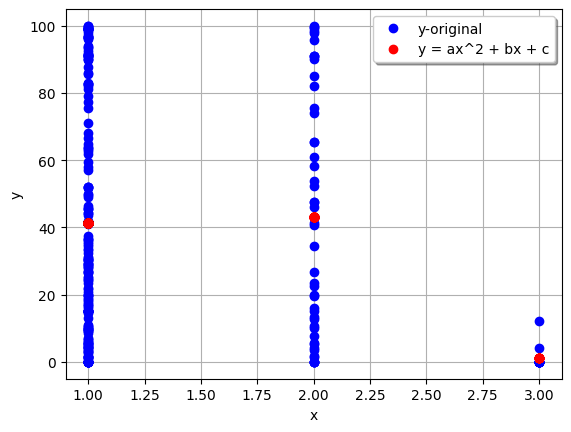

In [601]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original" , color= "blue")
plt.plot(x, y_pred1, 'bo', label="y = ax^2 + bx + c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [602]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1

0.070936793023744

In [603]:
#Calculamos el coeficiente de correlación del modelo
R1= np.sqrt(R2_Modelo1)
R1

np.float64(0.2663396197033855)

In [ ]:
#y = a/b*x**2 + c*x (Función polinomial inversa)

def func11(x, a, b, c):
    return (a / b) * x**2 + c * x

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros11, covs11= curve_fit(func11, df['Project Health'], df['Percent complete'])

In [ ]:
# Predicciones
y_pred11 = func11(x, *parametros11)

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original" , color= "blue")
plt.plot(x, y_pred11, 'bo', label="y = a/b*x**2 + c*x", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo11 = r2_score(y, y_pred11) 
R2_Modelo11

In [ ]:
#Calculamos el coeficiente de correlación del modelo
R11= np.sqrt(R2_Modelo11)
R11

***Project Health***

In [676]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['State']]
Var_Dep= df['Project Health']

In [677]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

#y = ax^2 + bx + c   ("Función cuadrática")

In [678]:
#y = ax^2 + bx + c   ("Función cuadrática")

def func1(x, a, b, c):
    return a*x**2 + b*x + c

In [679]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs1= curve_fit(func1, df['State'], df['Project Health'])

In [680]:
parametros1

array([-0.49033066,  2.82229459, -1.09639279])

In [681]:
# Predicciones
y_pred1 = func1(x, *parametros1)

In [682]:
y_pred1

,State
0,1.235571
1,1.235571
2,1.235571
3,1.235571
4,1.235571
...,...
241,1.235571
242,1.235571
243,1.235571
244,1.235571


C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\2251454816.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original" , color= "blue")
C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\2251454816.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1, 'bo', label="y = ax^2 + bx + c", color= "red")


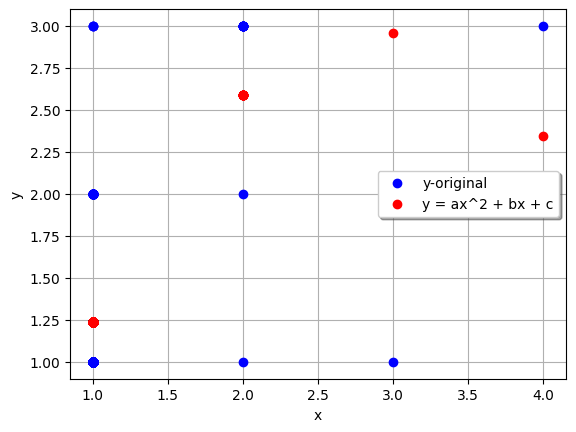

In [683]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original" , color= "blue")
plt.plot(x, y_pred1, 'bo', label="y = ax^2 + bx + c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [684]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1

0.3045617993436248

In [685]:
#Calculamos el coeficiente de correlación del modelo
R1= np.sqrt(R2_Modelo1)
R1

np.float64(0.5518711800263036)

y = (a*x**2 + b)/ c*x**2 (Función cociente entre polinomios)

In [710]:
#y = (a*x**2 + b)/ c*x**2 (Función cociente entre polinomios)

def func7(x, a, b, c):
    return (a * x**2 + b) / (c * x**2)

In [711]:
#Ajustamos los parámetros de la función curve_fit
parametros7, covs7= curve_fit(func7, df['State'], df['Project Health'])

In [712]:
# Predicciones
y_pred7 = func7(x, *parametros7)

C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\4067399592.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original" , color= "blue")
C:\Users\dorop\AppData\Local\Temp\ipykernel_25444\4067399592.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred7, 'bo', label="y = (a*x**2 + b)/ c*x**2", color= "red")


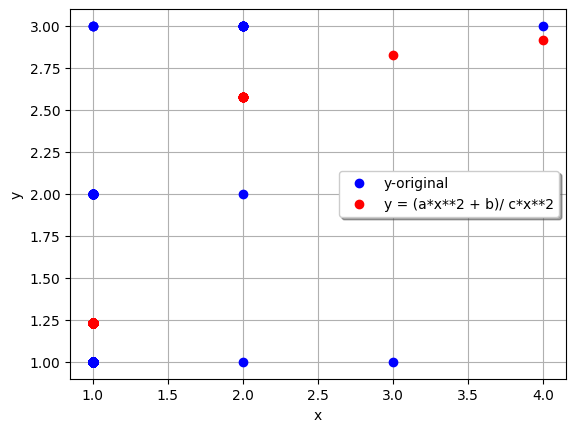

In [713]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original" , color= "blue")
plt.plot(x, y_pred7, 'bo', label="y = (a*x**2 + b)/ c*x**2", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [714]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo7 = r2_score(y, y_pred7) 
R2_Modelo7

0.3154211881184631

In [715]:
#Calculamos el coeficiente de correlación del modelo
R7= np.sqrt(R2_Modelo7)
R7

np.float64(0.5616237068700565)

In [740]:
corr = df.corr(numeric_only=True)

# Toma solo la mitad superior (para no duplicar pares y evitar la diagonal)
mask_upper = np.triu(np.ones(corr.shape), k=1).astype(bool)
corr_upper = corr.where(mask_upper)

# Pasa a formato largo (pares de variables)
pares = (
    corr_upper
    .stack()                # quita NaN y aplana (solo mitad superior)
    .reset_index()
    .rename(columns={"level_0": "Variable_dependiente", "level_1": "Variable_independiente", 0: "r"})
)

# Calcula |r| y R²
pares["|r|"] = pares["r"].abs()
pares["R2"] = (pares["r"] ** 2)

# Ordena (por magnitud de correlación)
pares = pares.sort_values(by="|r|", ascending=False)

pares_round = pares.copy()
pares_round["r"] = pares_round["r"].round(6)
pares_round["|r|"] = pares_round["|r|"].round(6)
pares_round["R2"] = pares_round["R2"].round(6)

# Muestra las primeras filas 
pares_round.head(10)

,Variable_dependiente,Variable_independiente,r,|r|,R2
20,Project manager,Project organization,0.502209,0.502209,0.252214
28,State,Project Health,0.493797,0.493797,0.243835
6,Project Type,BG,0.386941,0.386941,0.149723
5,Project Type,Project organization,0.375739,0.375739,0.141180
39,Project organization,BG,0.369726,0.369726,0.136697
44,Project Health,On-hold,0.334380,0.334380,0.111810
29,State,On-hold,0.325096,0.325096,0.105687
1,Project Type,Project manager,0.304068,0.304068,0.092457
27,State,BG,0.302922,0.302922,0.091762
21,Project manager,BG,0.277785,0.277785,0.077164
